In [41]:
import torch
import torch.nn as nn
import torchvision.models as models
import pickle
import numpy
from torch.autograd import Variable
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize
import torchvision.transforms as transforms
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
alexnet = models.alexnet(pretrained = True)

In [3]:
with open('C:/Users/Surabhi/Desktop/IIITD/5th SEM/ML/Assignments/HW3_NN/data/Q2/train_CIFAR.pickle', 'rb') as f: 
    data_train = pickle.load(f)
with open('C:/Users/Surabhi/Desktop/IIITD/5th SEM/ML/Assignments/HW3_NN/data/Q2/test_CIFAR.pickle', 'rb') as f: 
    data_test = pickle.load(f)

In [4]:
images = data_train['X']
labels = data_train['Y']
test_images = data_test['X']
test_labels = data_test['Y']

In [5]:
num_images = len(images)
num_test_images = len(test_images)

In [6]:
images_reshaped = images.reshape((num_images,3,32,32))
test_images_reshaped = test_images.reshape((num_test_images,3,32,32))

In [22]:
# images_resized = []
# for i in range(num_images):
#     images_resized.append(numpy.resize(images_reshaped[i],(1,3,227,227)))

In [23]:
# test_images_resized = []
# for i in range(num_test_images):
#     test_images_resized.append(numpy.resize(test_images_reshaped[i],(1,3,227,227)))

In [24]:
# images_resized = numpy.array(images_resized)
# test_images_resized = numpy.array(test_images_resized)

In [7]:
conv = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(), 
                           transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

In [8]:
features = []
for i in range(num_images):
    pilimg = Image.fromarray(numpy.array(images_reshaped[i].T))
    tensor = conv(pilimg).unsqueeze(0)
    fc_out = alexnet(tensor)
#     feature = fc_out.detach().numpy()
#     feature = numpy.squeeze(feature)
    feature = numpy.squeeze(fc_out).tolist()
    features.append(feature)

In [9]:
test_features = []
for i in range(num_test_images):
    pilimg = Image.fromarray(numpy.array(test_images_reshaped[i].T))
    tensor = conv(pilimg).unsqueeze(0)
    fc_out = alexnet(tensor)
    #feature = fc_out.detach().numpy()
    #feature = numpy.squeeze(feature)
    feature = numpy.squeeze(fc_out).tolist()
    test_features.append(feature)

In [ ]:
# features = []
# for i in range(num_images):
#     image_tensor = torch.from_numpy(images_resized[i]).float()
#     image_tensor = normal(image_tensor)
#     fc_out = alexnet(image_tensor)
#     feature = fc_out.detach().numpy()
#     feature = numpy.squeeze(feature)
#     features.append(feature)

In [11]:
# test_features = []
# for i in range(num_test_images):
#     image_tensor = torch.from_numpy(test_images_resized[i]).float()
#     image_tensor = normal(image_tensor)
#     fc_out = alexnet(image_tensor)
#     feature = fc_out.detach().numpy()
#     feature = numpy.squeeze(feature)
#     test_features.append(feature)

In [10]:
#features = numpy.array(features)
features = normalize(features)
print(features.shape)

(10000, 1000)


In [11]:
#test_features = numpy.array(test_features)
test_features = normalize(test_features)
print(test_features.shape)

(2000, 1000)


In [79]:
#Feature Normalization
# for i in range(len(features)):
#     features[i] = normalize(features[i])
# for j in range(len(test_features)):
#     test_features[j] = normalize(test_features[j])

In [18]:
f = open('features.pkl', 'wb')
pickle.dump(features, f)
f.close()

In [19]:
f = open('test_features.pkl', 'wb')
pickle.dump(test_features, f)
f.close()

In [13]:
x_train = features
y_train = labels
x_test = test_features
y_test = test_labels

In [24]:
classifier = SVC(kernel = 'linear', C = 0.5, probability = True)

In [25]:
classifier.fit(x_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
predictions = classifier.predict(x_test)

In [27]:
print(accuracy_score(predictions, y_test))

0.9165


In [28]:
confusion_matrix(predictions, y_test)

array([[900,  67],
       [100, 933]], dtype=int64)

In [29]:
probas = classifier.predict_proba(x_test)

In [39]:
auc = roc_auc_score(y_test, probas[:,1])
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
print(auc)

0.973951


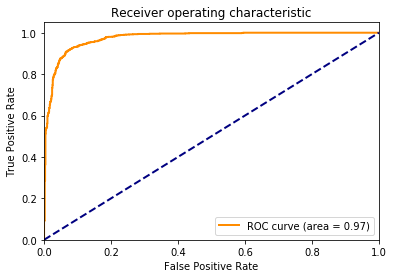

In [44]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw = 2, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()